In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs, make_circles
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
import warnings
import pandas as pd
from scipy.stats import multivariate_normal as mv
import random as rd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
warnings.filterwarnings("ignore")


plt.style.use('ggplot')

# TP n°1 : Support Vector Machine (SVM)

## Linear SVM

**3)** Draw a i.i.d. sample from a mixture of two Gaussian distrtibutions : each class is a Gaussian with specific parameters. One could use the function make_blobs available in sklearn.datasets library. Reserve 75% of the data for training and 25% for the test data.

In [0]:
mycenters = [[5,5],[-5,-5]]
X, y = make_blobs(n_samples=100, n_features=2, centers= mycenters, cluster_std=2.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [0]:
print(X_train.shape,y_train.shape)


(75, 2) (75,)


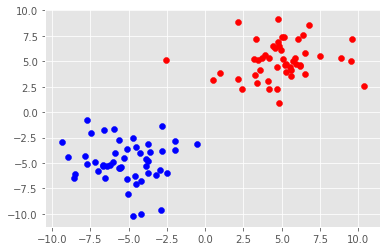

In [0]:
#Récupérer classe-1 et classe 1:
ind_classe0 =  np.where(y==0)
ind_classe1 =  np.where(y==1)
classe0 = X[ind_classe0]  
classe1 = X[ind_classe1] 
plt.scatter(classe0[:,0], classe0[:,1], c='r')
plt.scatter(classe1[:,0], classe1[:,1], c='b')
plt.show()

**4)** Since the probability distributions are known, numerically estimate the Bayes risk.

In [0]:
# Monte-Carlo estimation of the Bayes Risk (given this distribution)
n_mc = 10000
monte_carlo = 0
std = np.eye(2)
center1 = mycenters[0]
center2 = mycenters[1]
for _ in range(10000):
    a =  rd.random()
    if a < 0.5 :
        center = center1
        x = np.random.multivariate_normal(center1,std)
        eta = mv.pdf(x,center1,std)/(mv.pdf(x,center2,std)+mv.pdf(x,center1,std))
        monte_carlo += min(eta,1-eta)
        
    else: 
        center = center2
        x = np.random.multivariate_normal(center2, std)
        eta = mv.pdf(x,center1,std)/(mv.pdf(x,center2,std)+mv.pdf(x,center1,std))
        monte_carlo += min(eta,1-eta)
monte_carlo/10000

1.5975113045189569e-24

**5)** Draw the decision boundary H induced by SVM as well as the hyperplanes H1 and H−1. Vary the parameter C to see its impact on the number of support vectors. We can use the example https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html.

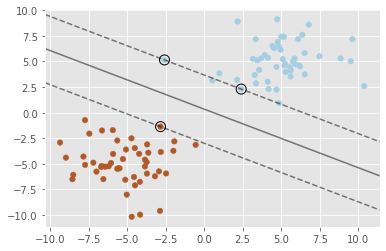

In [0]:

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X_train, y_train)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

**6)** Define the Gaussian classes such that the two distributions overlap. Draw an i.i.d. sample from the joint probability distribution. Apply a 5-fold Cross-Validation to find the optimal parameter C∗ to classify this new dataset using a linear kernel.

In [0]:
center = np.array([[0,0], [4,4]])
 
X, y = make_blobs(n_samples=1000, centers=center, n_features=2,
                  random_state=0, cluster_std =2)

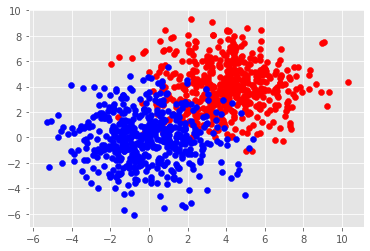

In [0]:
pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]
plt.scatter(X[pos,0], X[pos,1], c='r')
plt.scatter(X[neg,0], X[neg,1], c='b')
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.01,0.1,1,10,100,1000], 'kernel' :['linear']  }
clf = GridSearchCV(svm.SVC(),param_grid,cv = 5)
clf.fit(X,y)
print("le meilleur paramètre est 'C= %0.2f' " %clf.best_params_['C'])
print(pd.DataFrame(clf.cv_results_))

le meilleur paramètre est 'C= 1.00' 
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.004025      0.003359         0.000000        0.000000    0.01   
1       0.004065      0.003407         0.000000        0.000000     0.1   
2       0.010061      0.000014         0.000000        0.000000       1   
3       0.019709      0.000810         0.000000        0.000000      10   
4       0.080810      0.006897         0.000809        0.000990     100   
5       1.697412      1.913961         0.002210        0.003005    1000   

  param_kernel                           params  split0_test_score  \
0       linear  {'C': 0.01, 'kernel': 'linear'}               0.92   
1       linear   {'C': 0.1, 'kernel': 'linear'}               0.92   
2       linear     {'C': 1, 'kernel': 'linear'}               0.92   
3       linear    {'C': 10, 'kernel': 'linear'}               0.92   
4       linear   {'C': 100, 'kernel': 'linear'}               0.92   
5       linear  {

Les résultats sont les mêmes, peu importe la valeur de C avec le scoring de base (accuracy : $\frac{TP+TN}{TP+FP+TN+FN}$).

In [0]:
## Les scoring possibles
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:
## Avec precision
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.01,0.1,1,10,100,1000], 'kernel' :['linear']  }
clf = GridSearchCV(svm.SVC(),param_grid,scoring = 'precision',cv = 5)
clf.fit(X,y)
print("le meilleur paramètre est 'C= %0.2f', meilleur score : %0.2f " %(clf.best_params_['C'],clf.best_score_))
print(pd.DataFrame(clf.cv_results_))

Ca ne change rien, c'est que ça n'était pas le problème.

**7)** Show how tuning SVM hyperparameters on training data, for example by taking a Gaussian kernel (the parameters are therefore gamma and C), can lead to overfitting.

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C' : [1,10,100,1000], 'kernel' : ['rbf'], 'gamma' : [1,0.1,0.01,0.001,0.0001]}
clf = GridSearchCV(svm.SVC(),param_grid,cv = 5)
clf.fit(X,y)
print("les meilleurs paramètres sont : 'C= %0.2f' et 'gamma =%0.2f ' " %(clf.best_params_['C'], clf.best_params_['gamma']))
print("meilleur score : %0.2f" %clf.best_score_ )

les meilleurs paramètres sont : 'C= 10.00' et 'gamma =0.10 ' 
meilleur score : 0.93


On va essayer d'afficher l'hyperplan séparateur, pour une grande valeur de $C$ le modèle est overfit. 

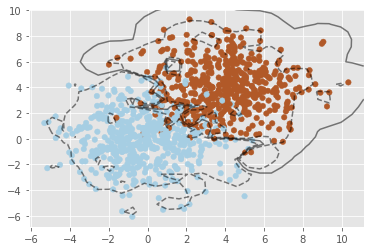

In [0]:
clf = svm.SVC(kernel = 'rbf', gamma = 1, C = 1000.00)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
#On n'affiche pas les support vectors, ça rend l'image illisible
plt.show()

## Non linear SVM

**8)** Define a new binary nonlinear classification problem : for instance, define one class as a Gaussian surrounded by the other chosen as a circle class, or choose the second class as a mixture of two Gaussian in such way that the separation problem is nonlinear. Generate a non-linearly separable dataset (we could for example use the function make_blobs available in sklearn.datasetslibrary ).

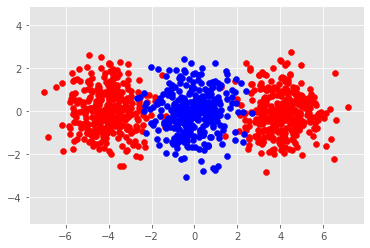

In [0]:
center = np.array([[0,0], [4,0], [-4,0]])

X, y = make_blobs(n_samples=1000, centers=center, cluster_std=1.0, n_features=2, random_state=0)
y[y==2] = 1

pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]


plt.scatter(X[pos,0], X[pos,1], c='r')
plt.scatter(X[neg,0], X[neg,1], c='b')
plt.axis('equal')
plt.show()

**9)** Use an SVM with a Gaussian kernel then a polynomial (with well-adapted parameters) then plot the decision boundaries of these algorithms on separate graphs.

les meilleurs paramètres sont : 'C= 1.00' et 'gamma =0.10 ' 
meilleur score : 0.97


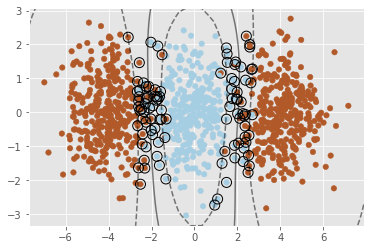

In [0]:
#Radial Basis Function
#On cherche les meilleurs paramètres pour le 
param_grid = { 'C' : [1,10,100,1000], 'kernel' : ['rbf'], 'gamma' : [1,0.1,0.01,0.001,0.0001]}
clf = GridSearchCV(svm.SVC(),param_grid,cv = 5)
clf.fit(X,y)
print("les meilleurs paramètres sont : 'C= %0.2f' et 'gamma =%0.2f ' " %(clf.best_params_['C'], clf.best_params_['gamma']))
print("meilleur score : %0.2f" %clf.best_score_ )

clf = svm.SVC(kernel = 'rbf', gamma = 0.10, C = 1.00)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


In [0]:
#Faire très attention à ne pas prendre C trop grand sinon l'algo ne termine pas (C plus grand que 1 expérmentalement)
#Polynomial 
param_grid = { 'C' : [0.1,0.01,0.001], 'kernel' : ['poly'], 'degree' : [2,3,4], 'coef0' : [-1,-0.5,0,0.5,1]}
clf = GridSearchCV(svm.SVC(),param_grid,cv = 5)
clf.fit(X,y)

print("les meilleurs paramètres sont : 'C= %0.2f' et 'degree= %0.2f' et 'coef0 =%0.2f ' " %(clf.best_params_['C'],clf.best_params_['degree'], clf.best_params_['coef0']))
print("meilleur score : %0.2f" %clf.best_score_)



les meilleurs paramètres sont : 'C= 0.00' et 'degree= 3.00' et 'coef0 =0.50 ' 
meilleur score : 0.98


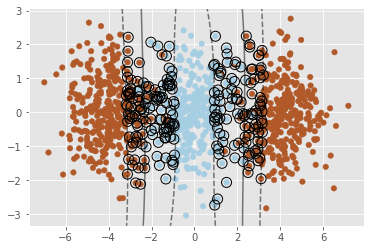

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

clf = svm.SVC(kernel = 'poly', degree = 3, C = 0.001, coef0 = 0.50)
clf.fit(X,y)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
          linewidth=1, facecolors='none', edgecolors='k')
plt.show()

**10)** We wish to compare classification performance between different SVMs based on different kernels (linear, polynomial and Gaussian). Propose a method allowing to compare these three algorithms.

**11)** Draw the learning curve of the algorithm : with fixed hyper-parameters and fixed test set, calculate the training and test errors by using training sub-sets of training data of various sizes (drawn randomly). Plot the train and test error based on the size of the train set subset. Estimate and display the accuracy of the Bayes predictor on the same graph. Comment.

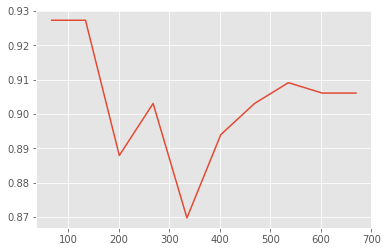

In [0]:
#Test du classificateur Gaussien
clf = GaussianNB()
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, shuffle = True)
#Learning Curve à la main 
scores = []
train_step = int(len(X_train)/10)
for k in range(10):
    clf.fit(X_train[:(k+1)*train_step],y_train[:(k+1)*train_step]) #fit avec des echantillons de taille différente
    scores.append(clf.score(X_test, y_test))
plt.plot(train_step*(1 + np.array(range(10))), scores)



Si l'échantillon de test est trop petit, en réitérant le process on n'a pas tendance à avoir les mêmes courbes. Pour ce genre de situations, découper naïvement les données en train et test n'est peut être pas optimum. Essayons avec learning curve de sklearn qui calcule le score par CV

<Figure size 432x288 with 0 Axes>

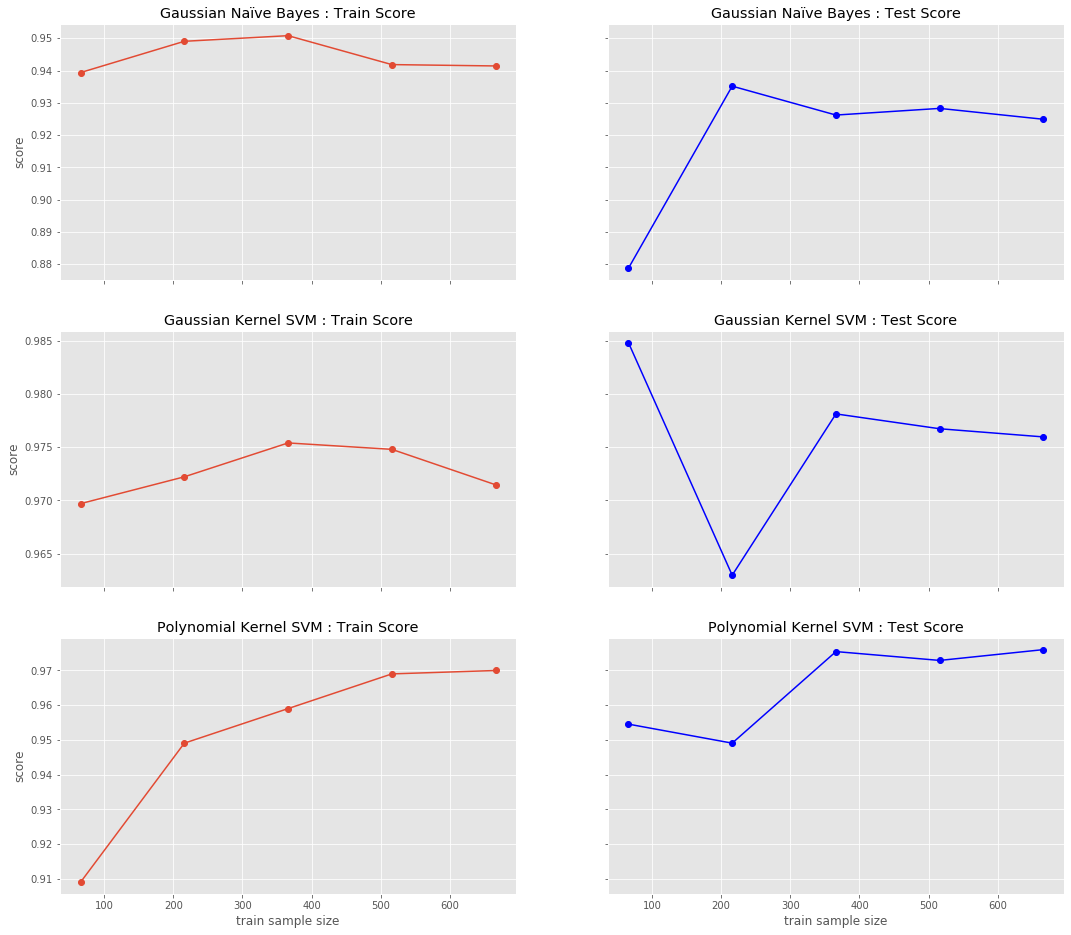

In [0]:
#With Sklearn
clf = GaussianNB()
#Calculating the learning curve
learn_curve = learning_curve(clf,X,y)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.2, hspace=0.2)
fig, axs = plt.subplots(3,2,sharex='col', sharey='row',figsize=(18, 16))
#Plotting train error
axs[0][0].plot(learn_curve[0],learn_curve[1][:,0],marker = 'o')
axs[0][0].set_title('Gaussian Naïve Bayes : Train Score')
#Plotting test error
axs[0][1].plot(learn_curve[0],learn_curve[1][:,1], color = 'blue',marker = 'o')
axs[0][1].set_title('Gaussian Naïve Bayes : Test Score')

#Rbf Kernel SVM 
clf = svm.SVC(kernel = "rbf", C = 1.00, gamma = 0.10)
#Calculating the learning curve
learn_curve = learning_curve(clf,X,y)
#Plotting train error
axs[1][0].plot(learn_curve[0],learn_curve[1][:,0], marker = 'o')
axs[1][0].set_title('Gaussian Kernel SVM : Train Score')
#Plotting test error
axs[1][1].plot(learn_curve[0],learn_curve[1][:,1], color = 'blue', marker = 'o')
axs[1][1].set_title('Gaussian Kernel SVM : Test Score')

#Polynomial kernel SVM
clf = svm.SVC(kernel = "poly", C= 0.001, degree = 3, coef0 = 0.5)
#Calculating the learning curve
learn_curve = learning_curve(clf,X,y)
#Plotting train error
axs[2][0].plot(learn_curve[0],learn_curve[1][:,0],marker = 'o')
axs[2][0].set_title('Polynomial Kernel SVM : Train Score')
#Plotting test error
axs[2][1].plot(learn_curve[0],learn_curve[1][:,1], marker = 'o', color = 'blue')
axs[2][1].set_title('Polynomial Kernel SVM : Test Score')
for ax in axs.flat:
    ax.set(xlabel='train sample size', ylabel='score')
for ax in axs.flat:
    ax.label_outer()

**12)** Add noise to the dataset by randomly modifying the labels of some training data. Then, draw the complexity curves of the algorithm : with set train and test set, draw the train and test error as a function of the complexity (i.e. as a function of the value of the hyper-parameter controlling the complexity, or the number of support vector). Comment.

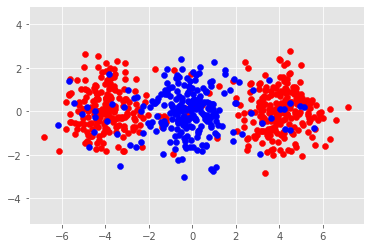

In [0]:
n_noise = 50
n_tr = len(y_train)
idx = np.random.choice(range(n_tr), n_noise)
y_train[idx] = 1 - y_train[idx]

pos = np.where(y_train == 1)[0]
neg = np.where(y_train == 0)[0]

plt.scatter(X_train[pos,0], X_train[pos,1], c='r')
plt.scatter(X_train[neg,0], X_train[neg,1], c='b')
plt.axis('equal')
plt.show()